<a href="https://colab.research.google.com/github/Mahnoor-14/Case_Study_Global-Tech-University-Admissions-Optimizer/blob/main/Case_Study_Global_Tech_University_Admissions_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/ATom/ML_Project3/Admission_Predict.csv")

In [26]:
df["SOP"].value_counts()
#categorical

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [27]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
df["LOR "].value_counts() #less than 10 -- categorical

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


In [29]:
# Check whether there are empty rows or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [30]:
df["Research"].value_counts()

,count
Research,
1,219
0,181


- Drop serial number column
-describe
-missing values
-duplicates
-outliers
-distrubution
-data inconsist
-visualisations
-corelations
-linearity( LR)
-encoding?
-stand/ normalisation

In [31]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [32]:
# drop the serial column
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [33]:
#check for missing values
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [34]:
#chekc for duplicates
df.duplicated().sum()

np.int64(0)

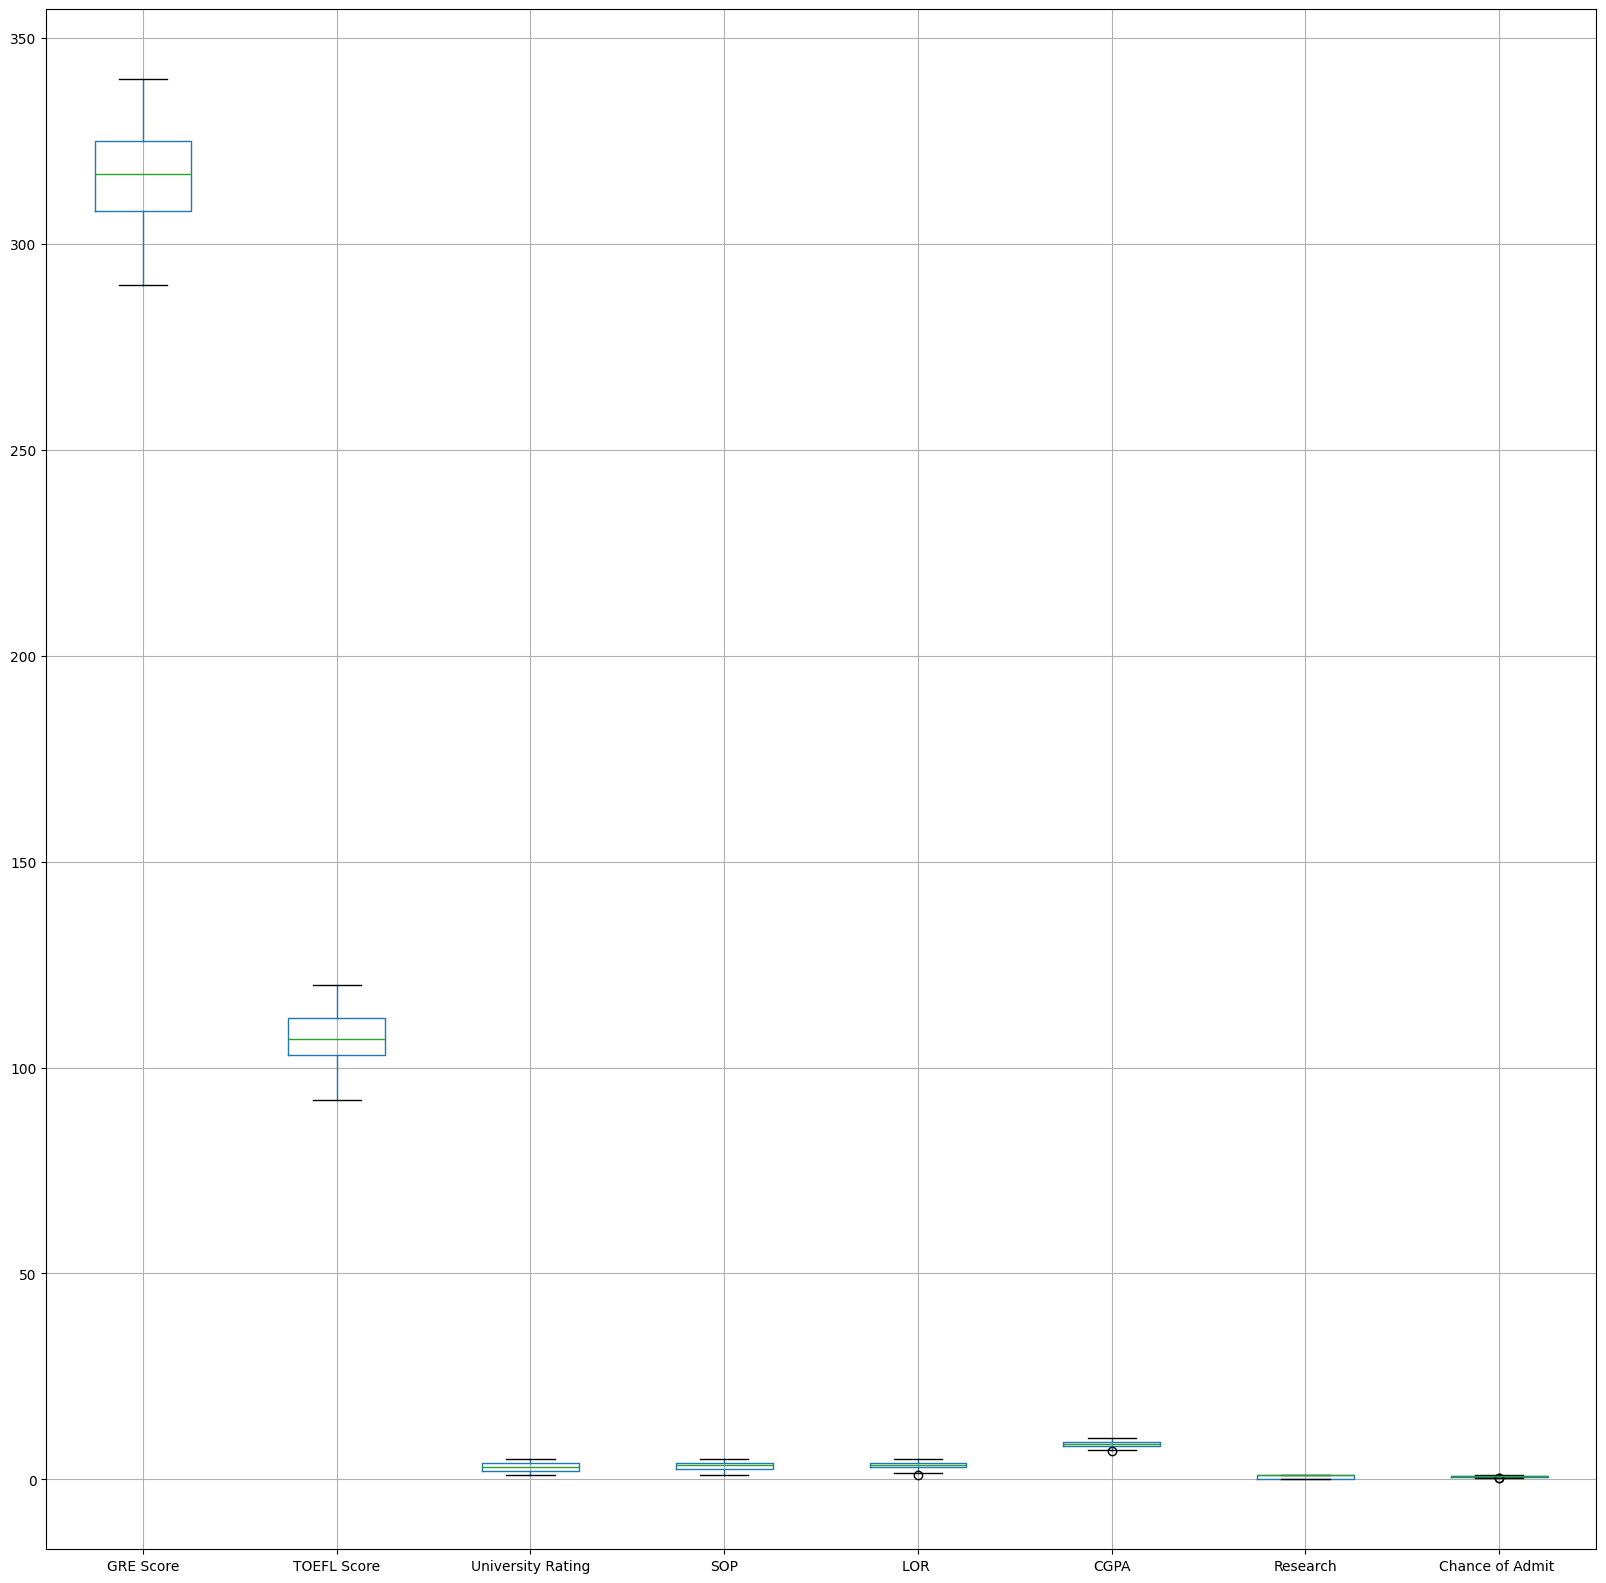

In [35]:
#check fro outliers in whole data
df.boxplot(figsize=(20,20))
plt.show()

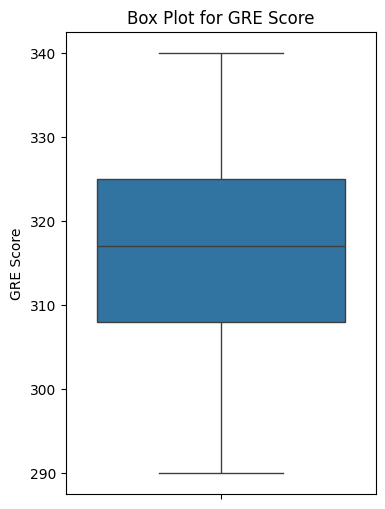

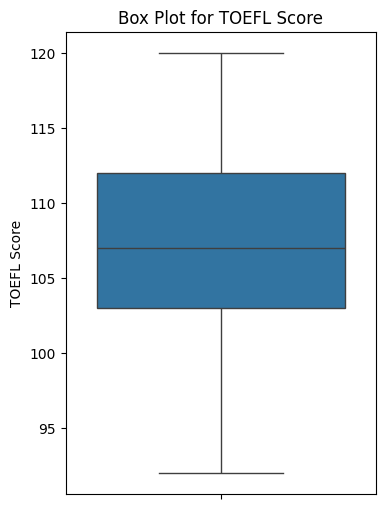

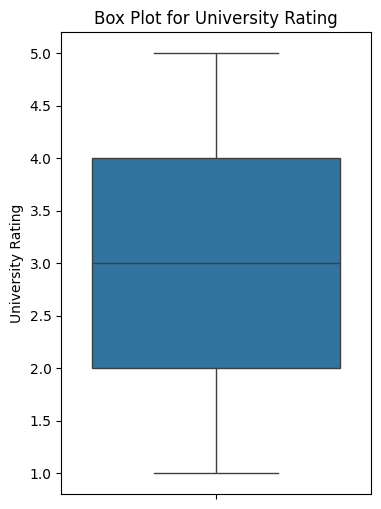

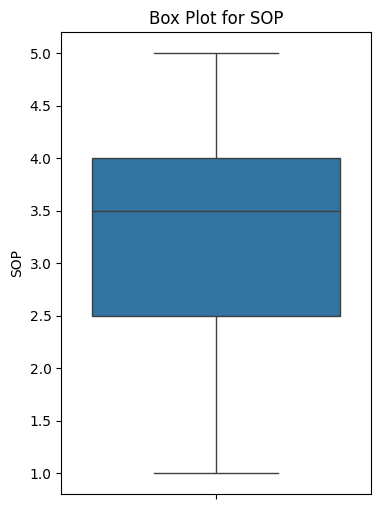

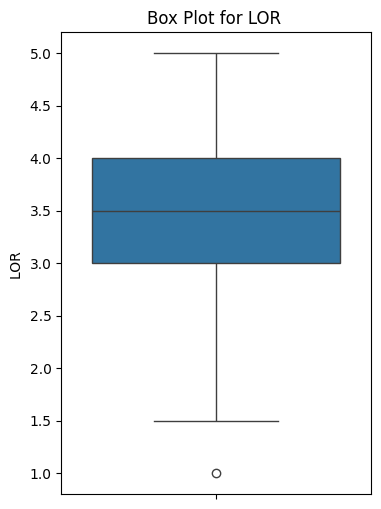

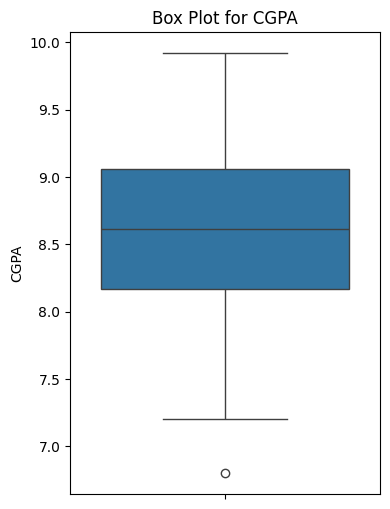

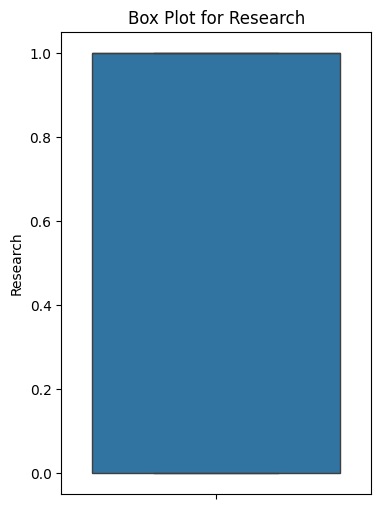

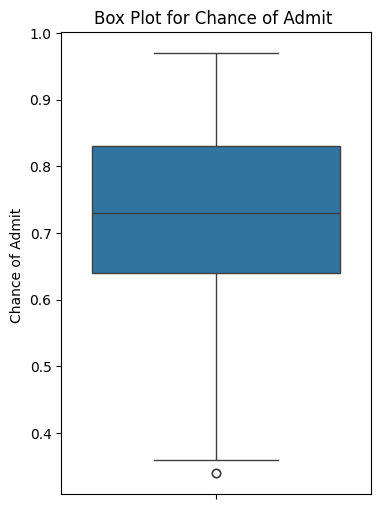

In [36]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [52]:
#check the row with 1 lor
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [53]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [54]:
df["SOP"].unique()


array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [55]:
df["SOP"].value_counts()

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [56]:
df["LOR "].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [57]:
# data inconsistencies in Categorical columns
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


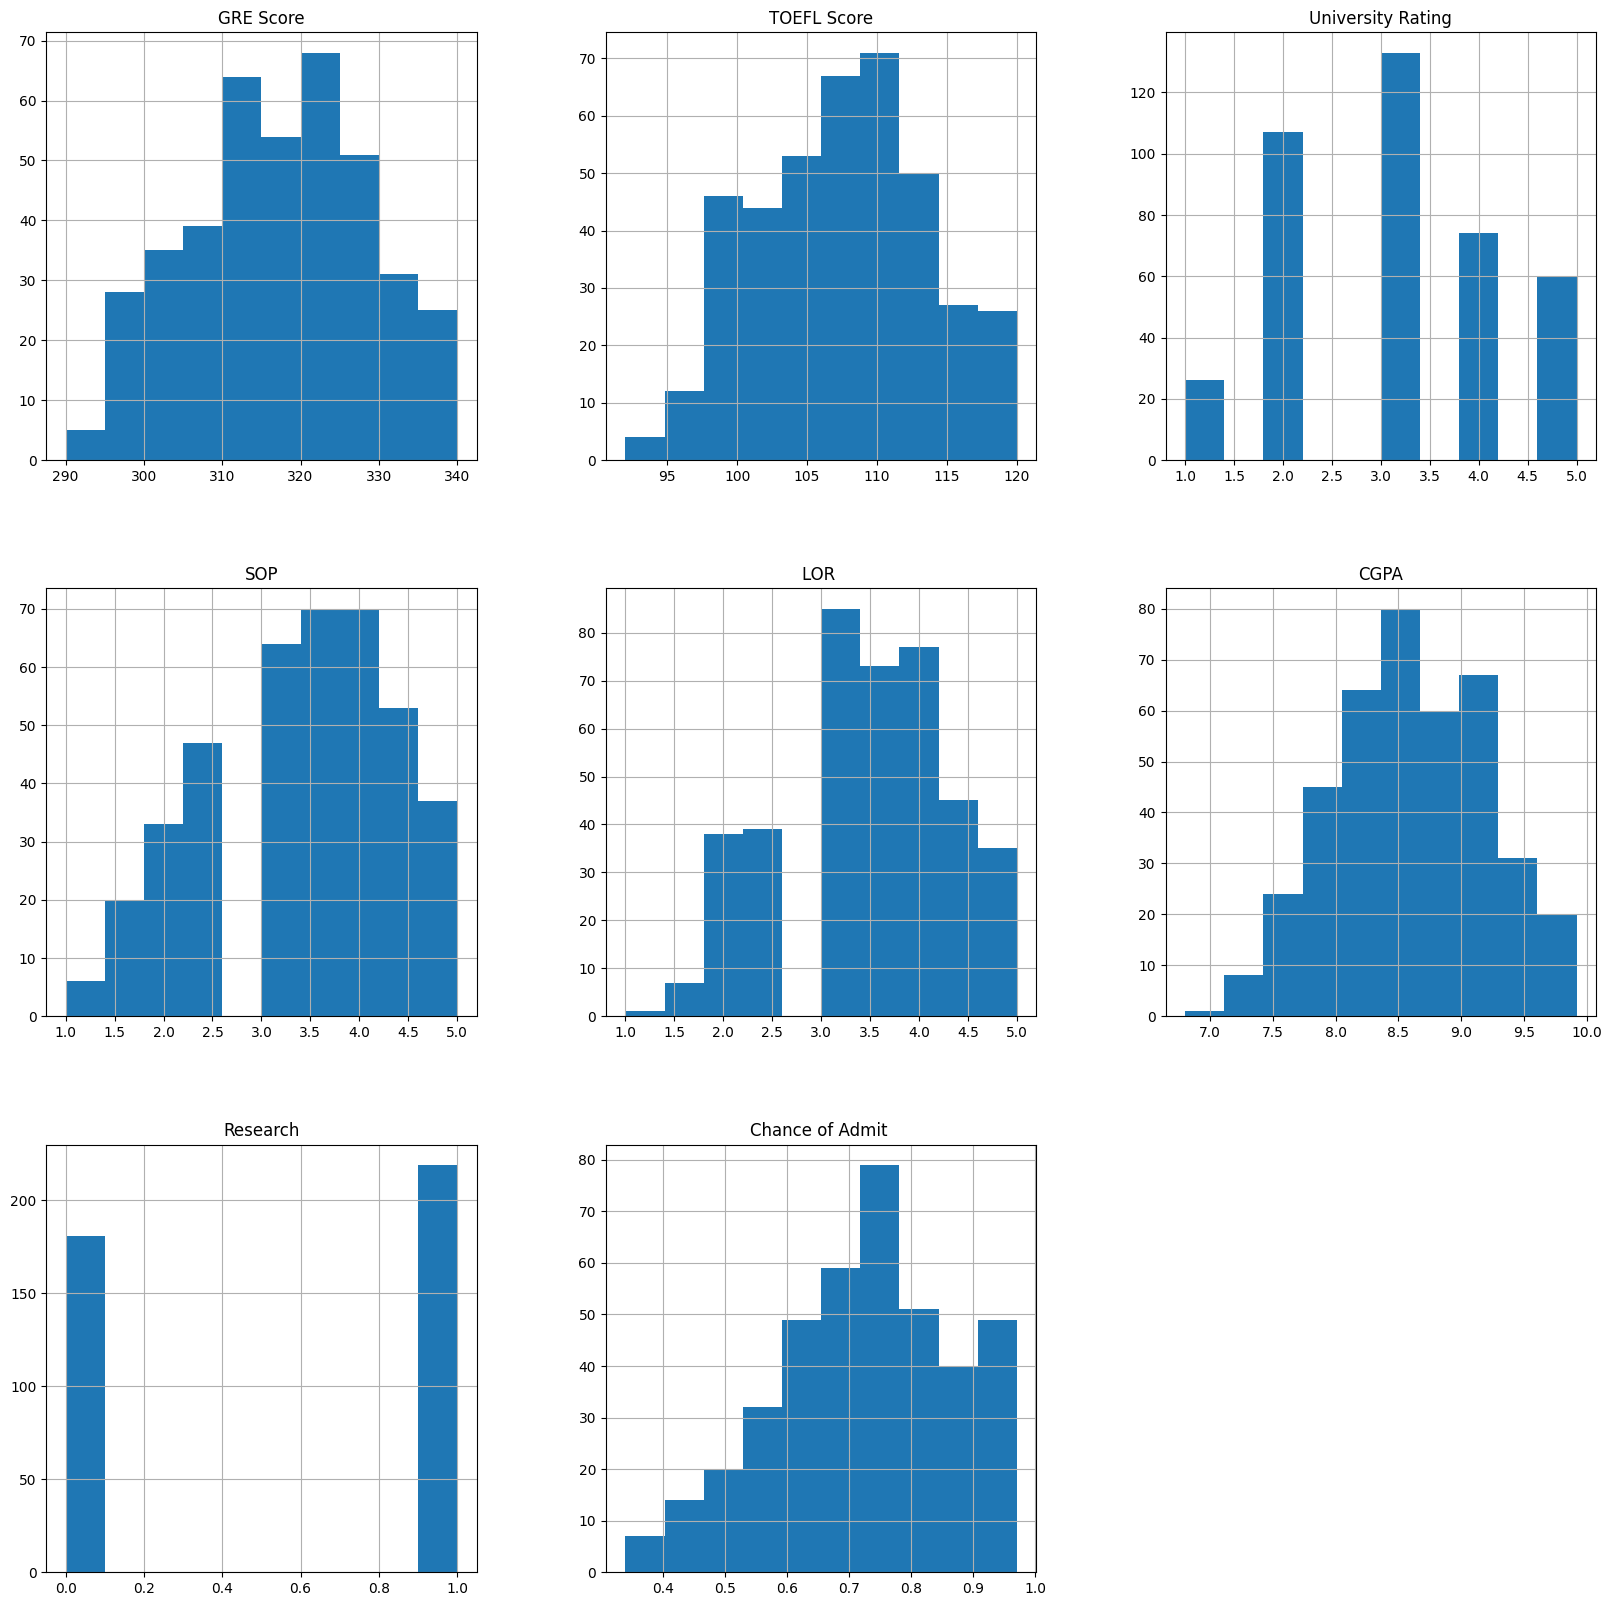

In [58]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

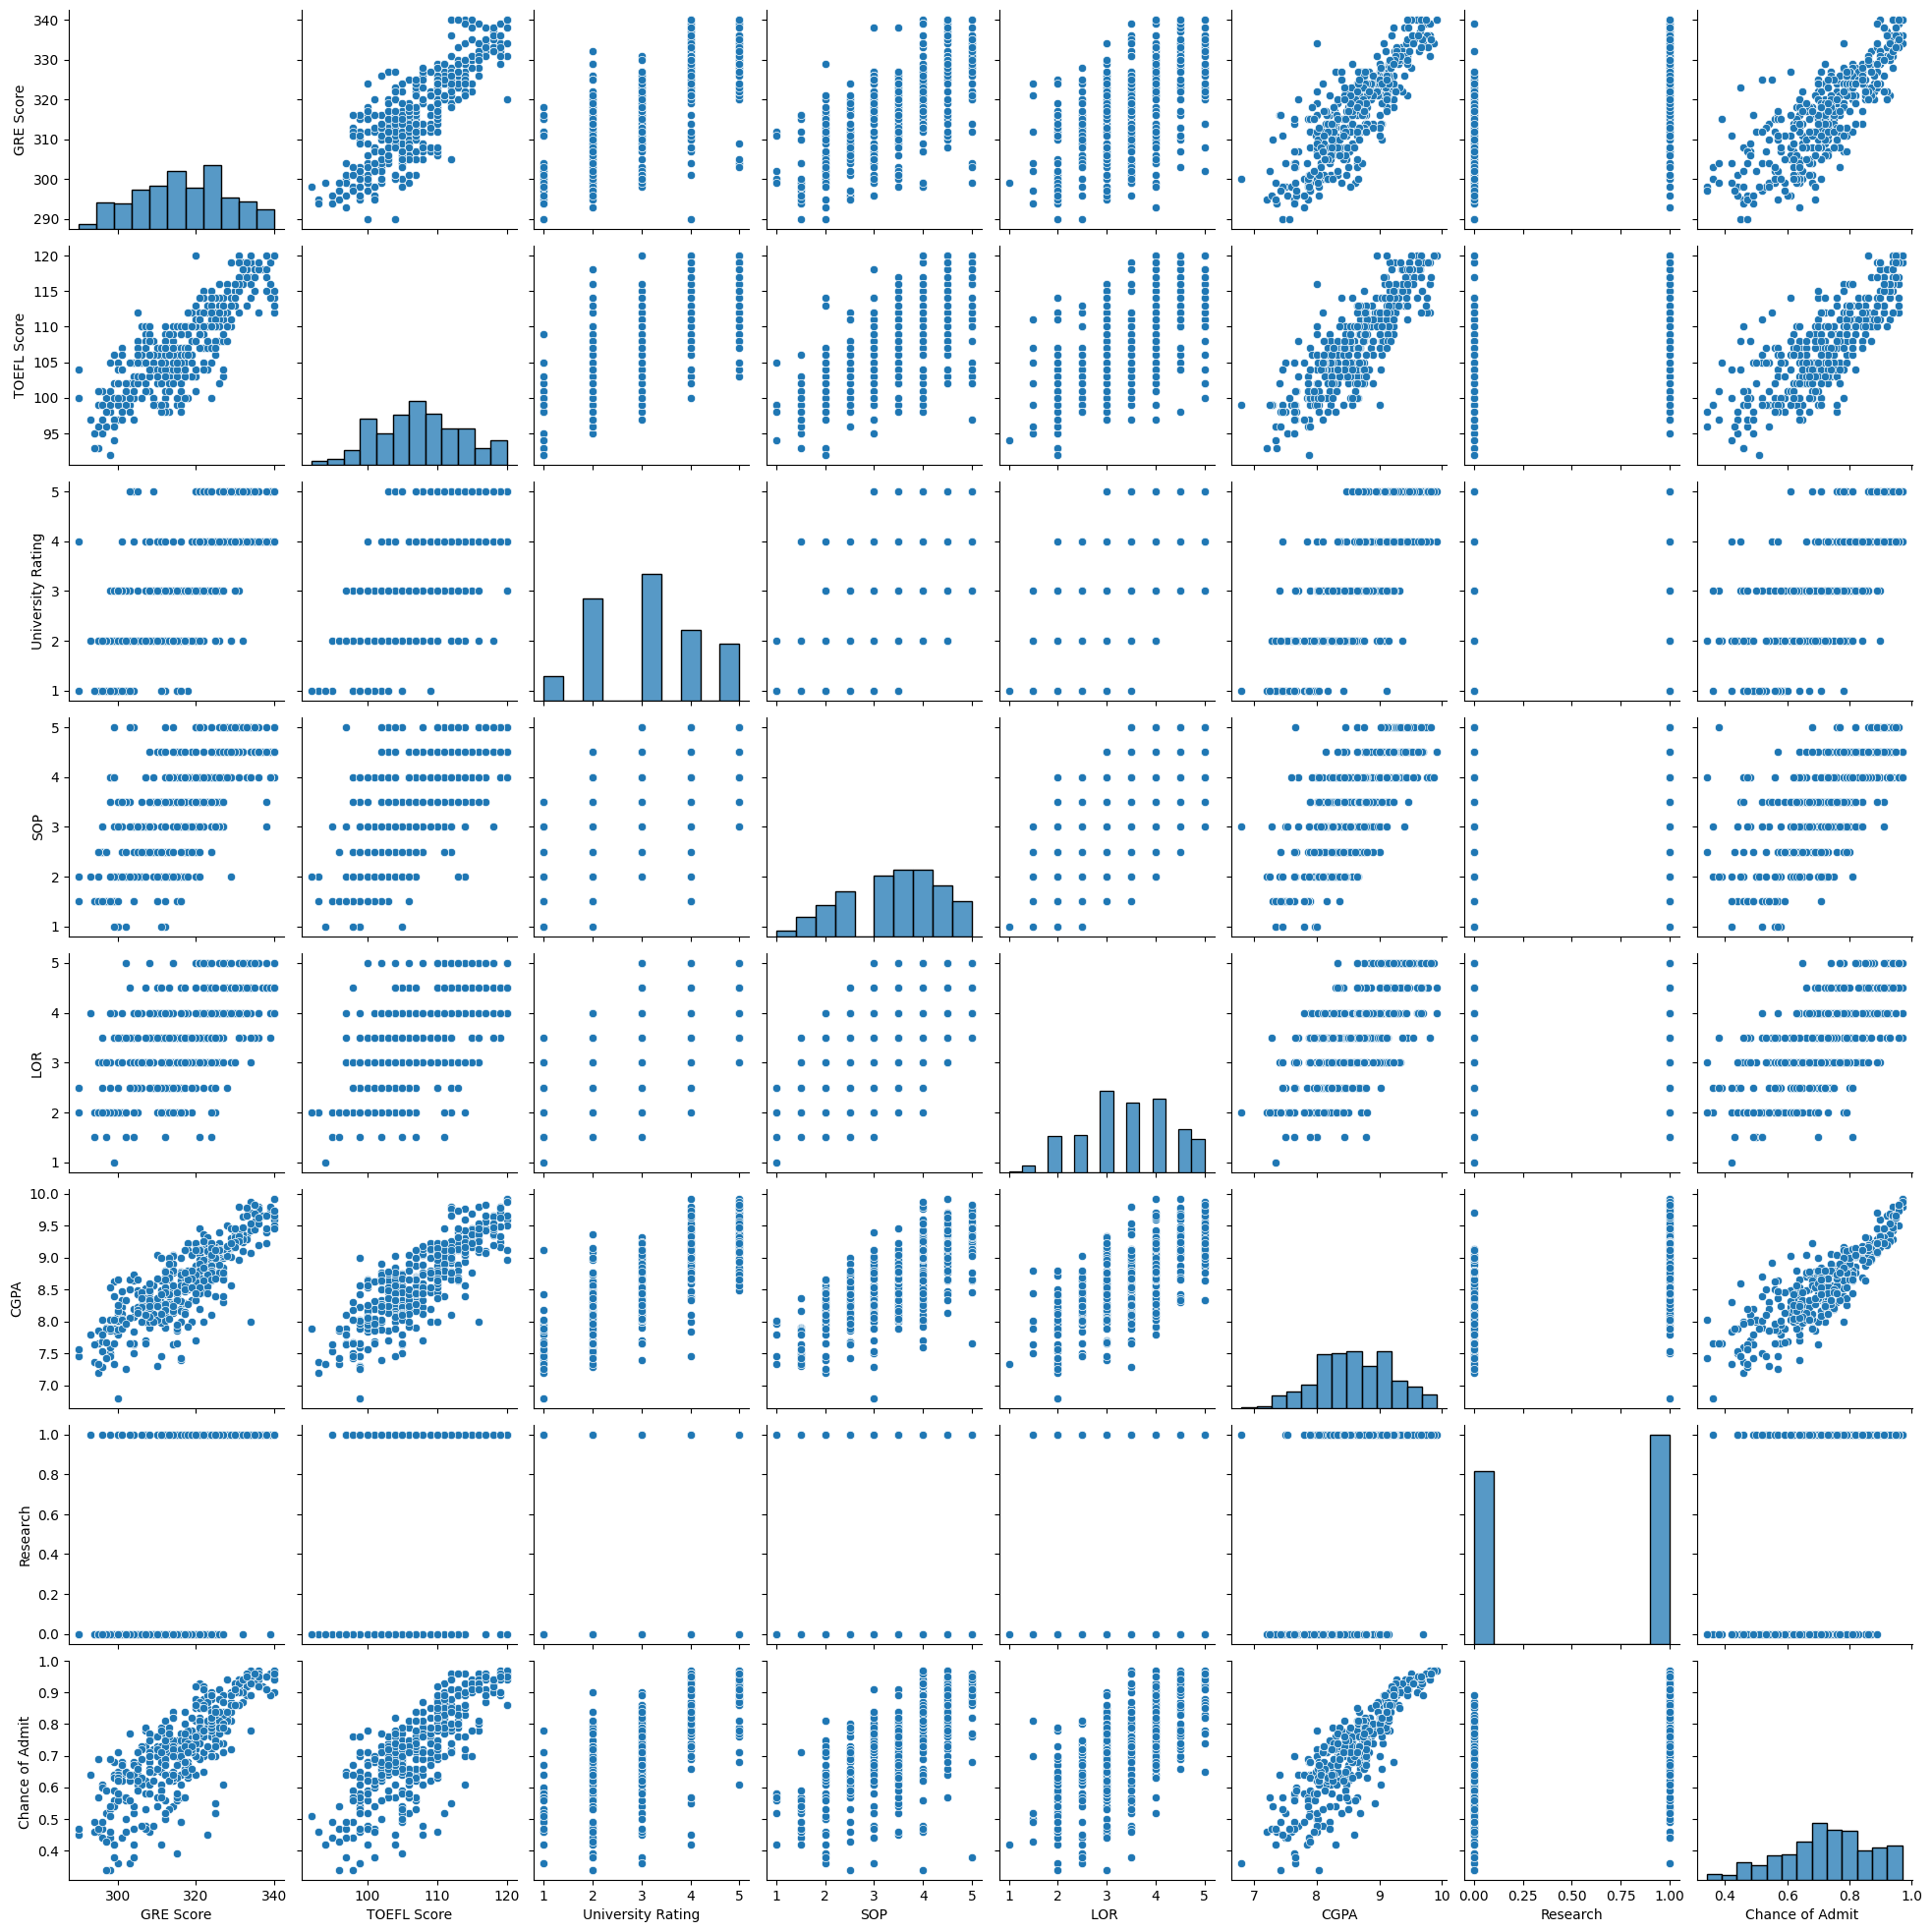

In [59]:
# linearity with chances of admission
sns.pairplot(df)
plt.show()

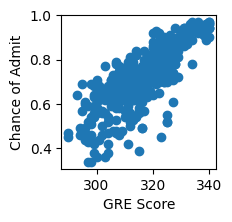

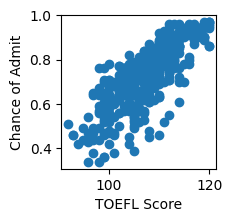

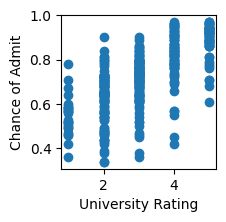

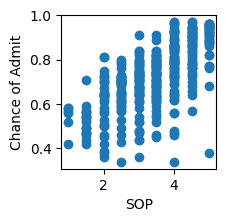

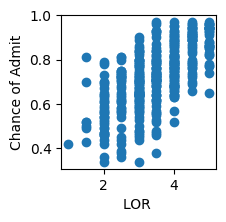

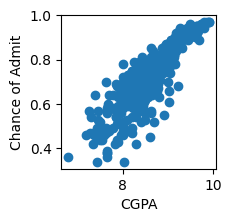

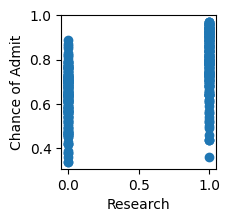

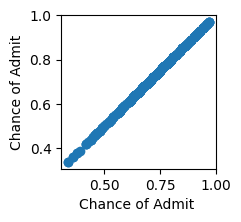

In [60]:
# scatter plot
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

Tofel, gre, cgpa are highly linear with output( chances Of admissions)

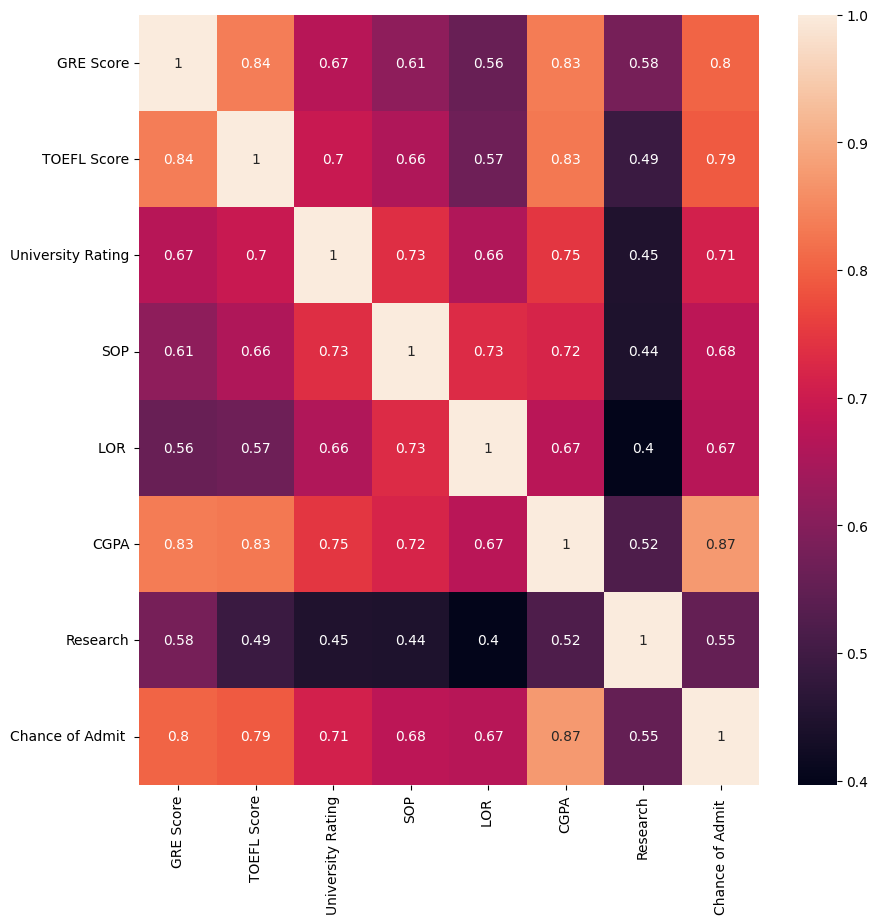

In [61]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

CGPA, GRE and TOFL are highly corelated with o/p

many columns highlhy multicolinear!--- LR a good choice?-- NO

try for DT and RF

In [62]:
# scaling of all data except chance of admission
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [63]:
#convert the response to df
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


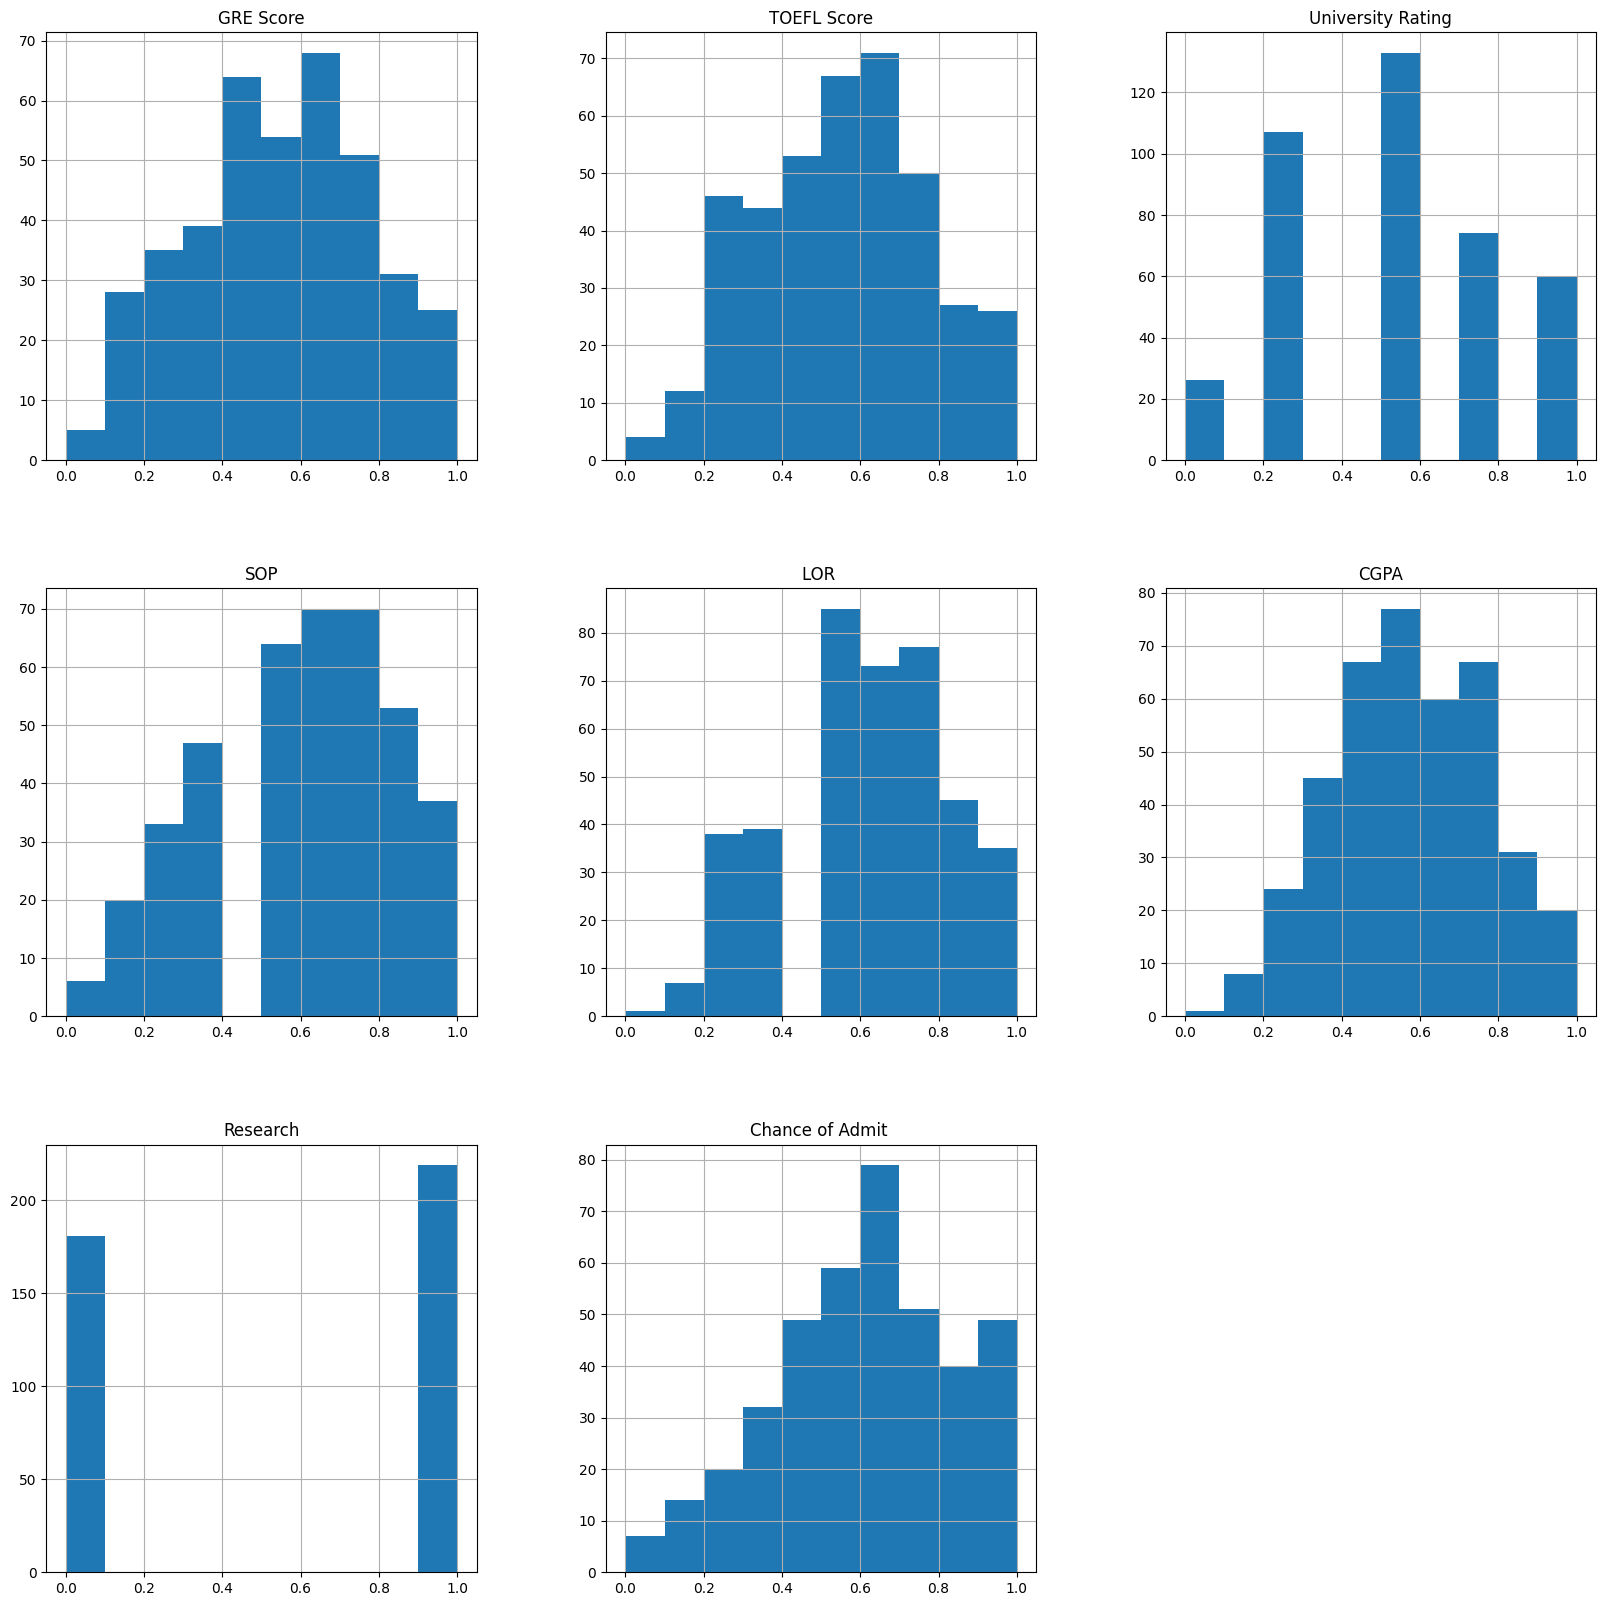

In [64]:
#historgram of scaled data
df_scaled.hist(figsize=(20,20))
plt.show()

In [65]:
#z score normalisation/ standardisation--- shape of the data -- sclae data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled


StandardScaler()

In [66]:

# Sklearn library
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [95]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


Now, we can use above x&y axises on the fit operation of the linear regression model.

In [68]:
linear_reg.fit(x,y)

LinearRegression()

<a id="11"></a> <br>
**1.1. Prediction**

We will predict the values according to linear_reg model.

<a id="12"></a> <br>
**1.2. R Square (LR)**

We can evaluate the linear regression model performance with R Square.
* y: Chance of Admit values
* y_head: predicted Chance of Admit value

First, we must be sure that y and y_head values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples: [500, 312]

In [69]:
#training and testing split
#400- 320 training & 80- testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [71]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [72]:
# test my algo
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [73]:
LR_PD = pd.DataFrame(y_pred)
print(LR_PD)

           0
0   0.651174
1   0.723687
2   0.935368
3   0.821643
4   0.581587
..       ...
75  0.721818
76  0.689644
77  0.594426
78  0.878406
79  0.757793

[80 rows x 1 columns]


In [74]:
#overfitting and unfitting
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [75]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

In [76]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.62, 0.73, 0.93, 0.81, 0.59, 0.91, 0.59, 0.38, 0.65, 0.91, 0.79,
       0.93, 0.49, 0.91, 0.76, 0.75, 0.71, 0.42, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.76, 0.71, 0.67, 0.69, 0.84, 0.76, 0.94, 0.48,
       0.44, 0.72, 0.71, 0.72, 0.79, 0.73, 0.93, 0.71, 0.65, 0.78, 0.94,
       0.88, 0.85, 0.97, 0.64, 0.93, 0.88, 0.93, 0.74, 0.79, 0.95, 0.7 ,
       0.68, 0.72, 0.85, 0.59, 0.88, 0.64, 0.65, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.86, 0.88, 0.87, 0.75, 0.8 , 0.93, 0.89, 0.54, 0.76, 0.77,
       0.53, 0.87, 0.79])

In [78]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.009437500000000001
RMSE for DT: 0.09714679613862724
MAE for DT: 0.06525
R² Score for DT: 0.6345363179534034


In [79]:
#using grid searchCV to get best parameters for decision tree regressor

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_split=20, splitter='random')
Best Score (R2): 0.7078087874951462
Test Score (R2): 0.7215689849178604


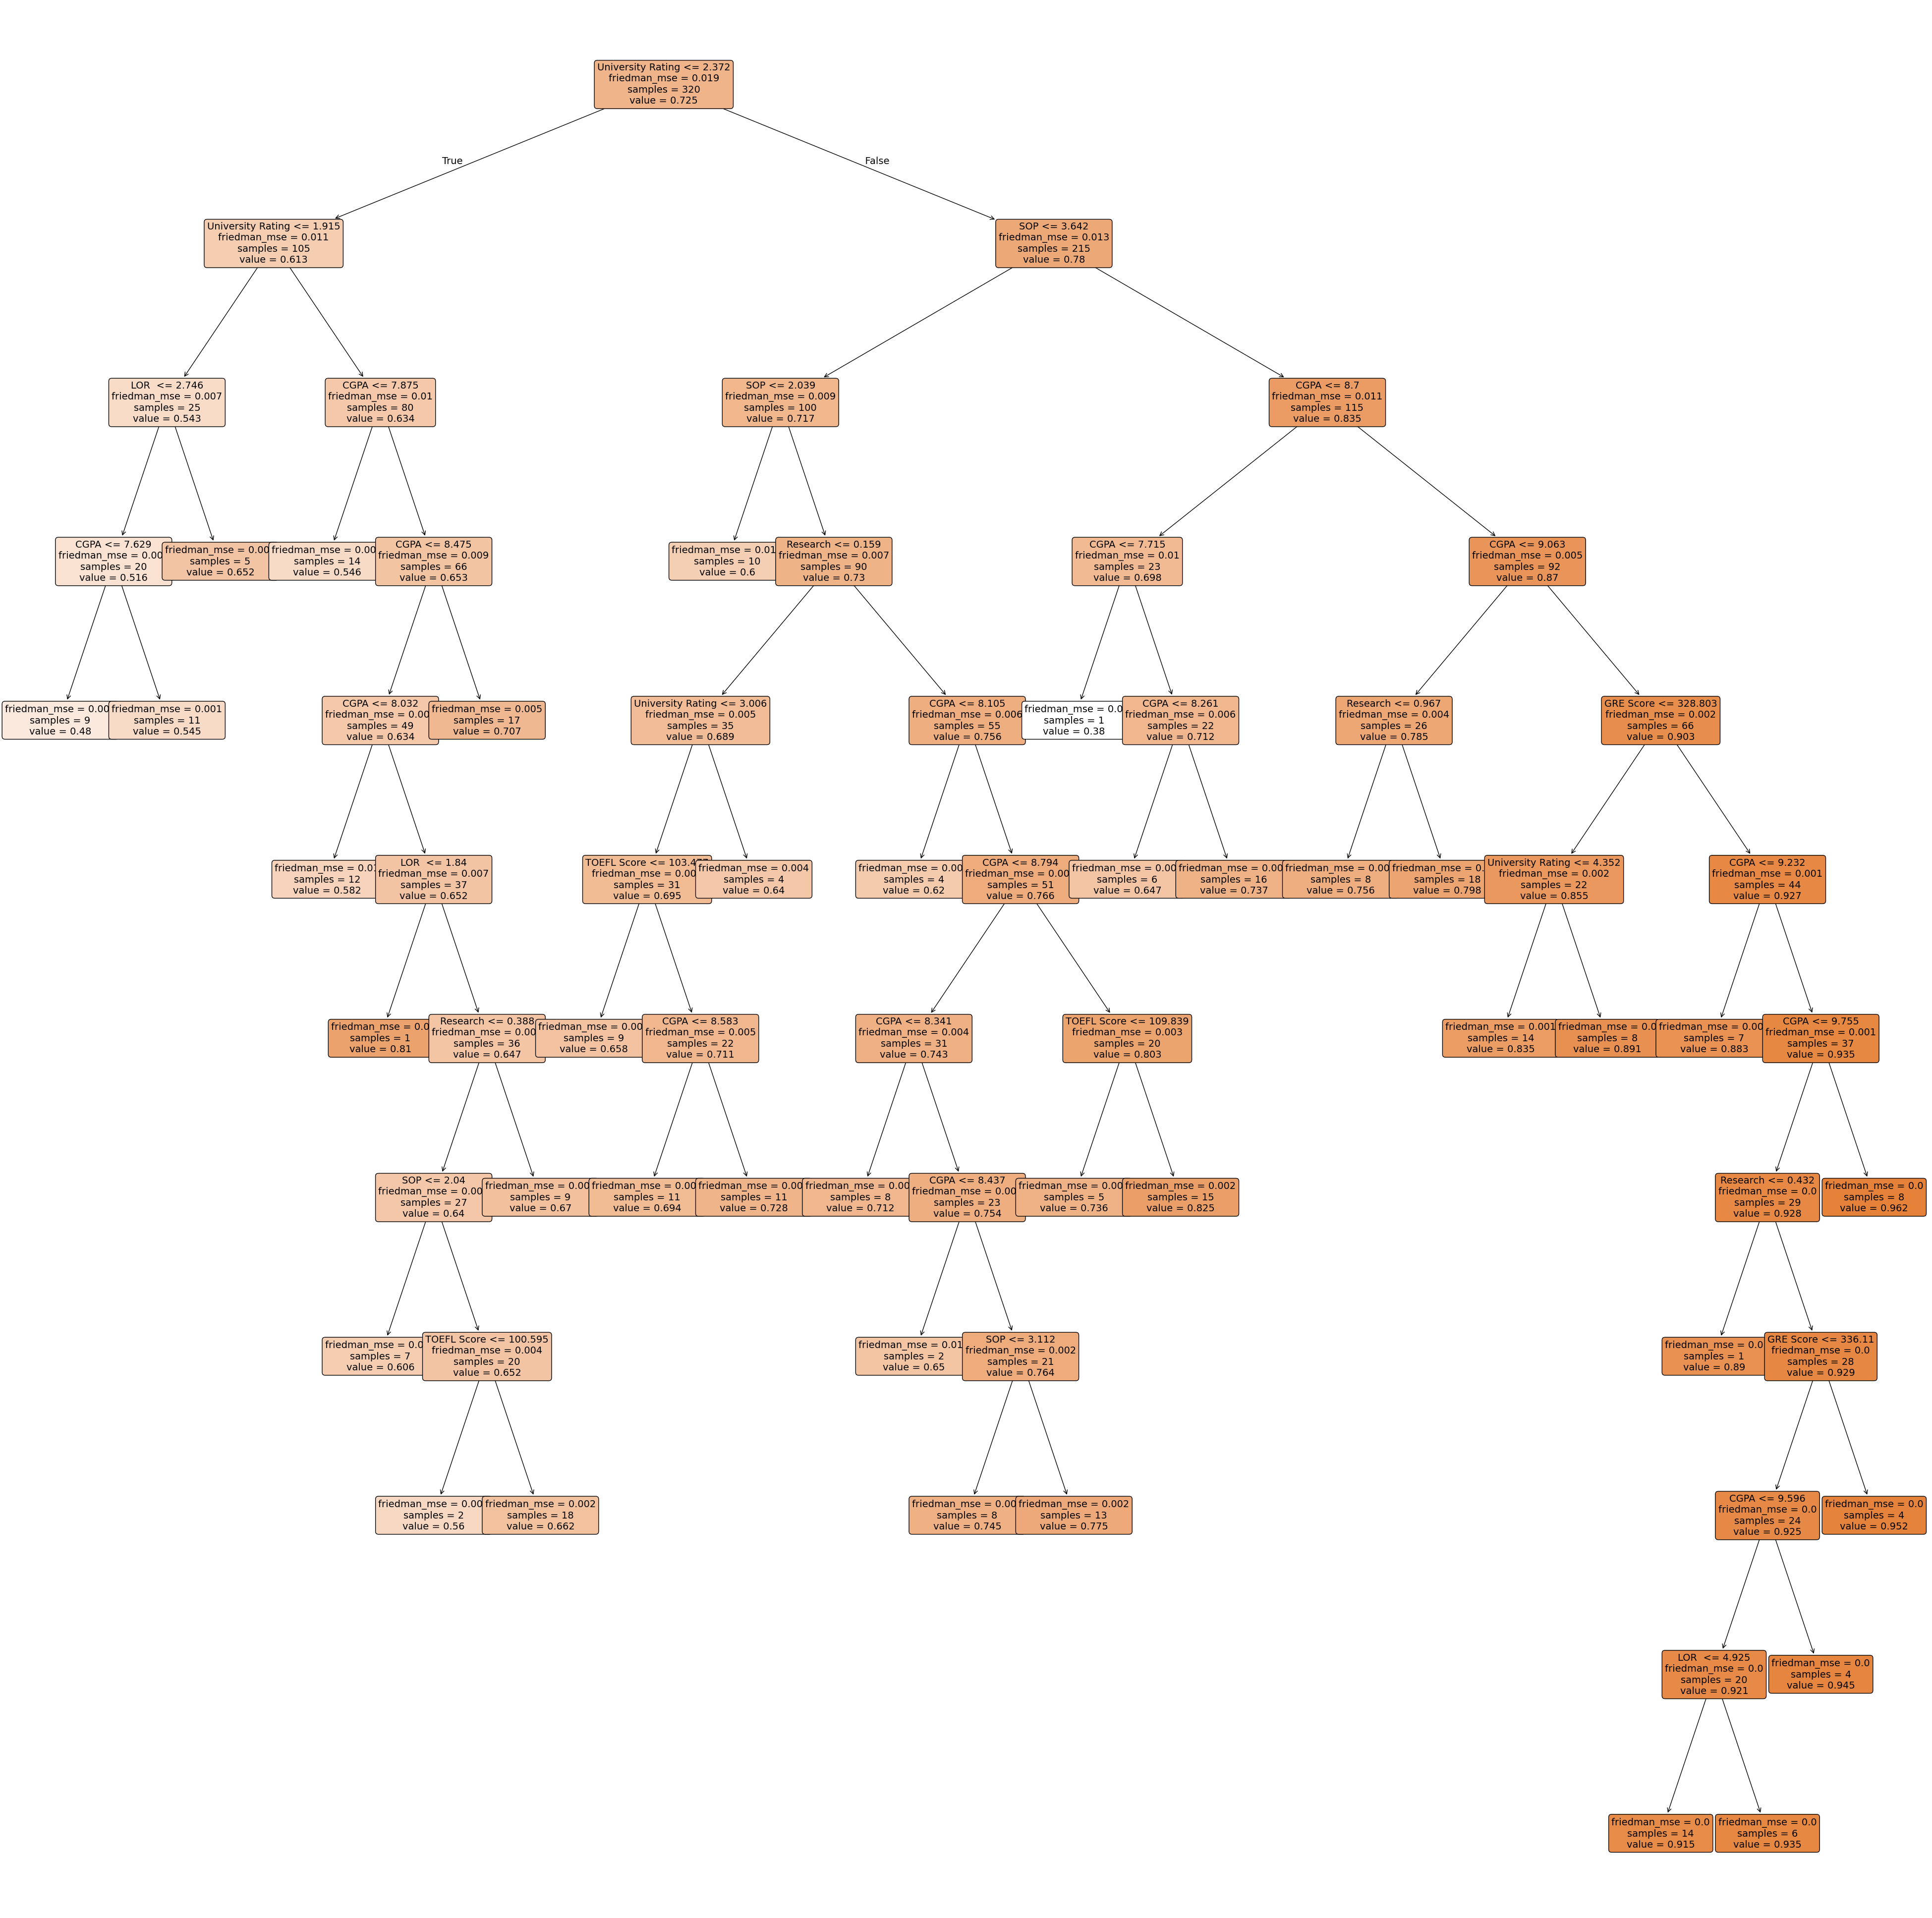

In [80]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns,
              class_names=y,
              filled=True,
              rounded=True,
              fontsize=14)

In [81]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)


--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.48]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<a id="5"></a> <br>
5. **Random Forest Regression (RFR)**

In [82]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)

random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [83]:
y_rf=random_forest_reg.predict(x_test)


In [84]:
print("--------------------Result for RF----------------------------------------------")
print("MSE for RF:", mean_squared_error(y_test, y_rf))
print("RMSE for RF:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for RF:", mean_absolute_error(y_test, y_rf))
print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for RF: 0.004994038499999999
RMSE for RF: 0.07066851137529359
MAE for RF: 0.04977500000000004
R² Score for RF: 0.8066077140670239


RFR Tuned

In [85]:
rf_t = RandomForestRegressor(random_state=42)

# 2. Create the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 3. Set up the Grid Search
grid_search = GridSearchCV(
    estimator=rf_t,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'  # or use 'r2' depending on your goal
)

# 4. Fit the model
grid_search.fit(x_train, y_train)

# 5. Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 6. Make predictions
y_pred_rf_t = best_rf.predict(x_test)

# 7. Evaluate
mse = mean_squared_error(y_test, y_pred_rf_t)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf_t)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
327 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 0.07
R² Score: 0.82


In [86]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for RF:", mean_squared_error(y_test, y_rf))
print("RMSE for RF:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for RF:", mean_absolute_error(y_test, y_rf))
print("R² Score for RF:", r2_score(y_test, y_rf))

print("--------------------Result for RF tuned----------------------------------------------")
print("MSE for RF _ T:", mean_squared_error(y_test, y_pred_rf_t))
print("RMSE for RF _ T:", np.sqrt(mean_squared_error(y_test, y_pred_rf_t)))
print("MAE for RF _ T:", mean_absolute_error(y_test, y_pred_rf_t))
print("R² Score for RF _ T:", r2_score(y_test, y_pred_rf_t))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.009437500000000001
RMSE for DT: 0.09714679613862724
MAE for DT: 0.06525
R² Score for DT: 0.6345363179534034
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.8163582941539866
--------------------Result for RF not tuned----------------------------------------------
MSE for RF: 0.004994038499999999
RMSE for RF: 0.07066851137529359
MAE for RF: 0.04977500000000004
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
MSE for RF _ T: 0.004742245766299641
RMSE for RF _ T: 0.06886396565911407
MAE for RF _ T: 0.04751065347410756
R² Score for RF _ T: 0.8163582941539866


In [87]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for tuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF _T:", r2_score(y_test, y_pred_rf_t))


--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6345363179534034
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for tuned DT : 0.8163582941539866
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF _T: 0.8163582941539866


In [88]:

print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)
print("--------------------Prediction with rf With tuning----------------------------------------------")
b3=grid_search.predict(c)
print(b3)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.46995296]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]
--------------------Prediction with rf With tuning----------------------------------------------
[0.46995296]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


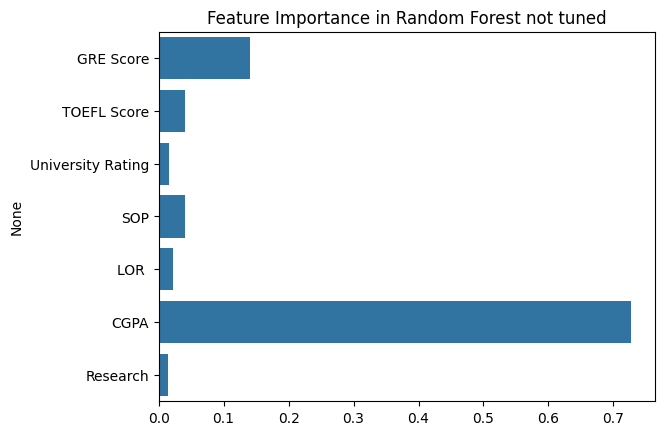

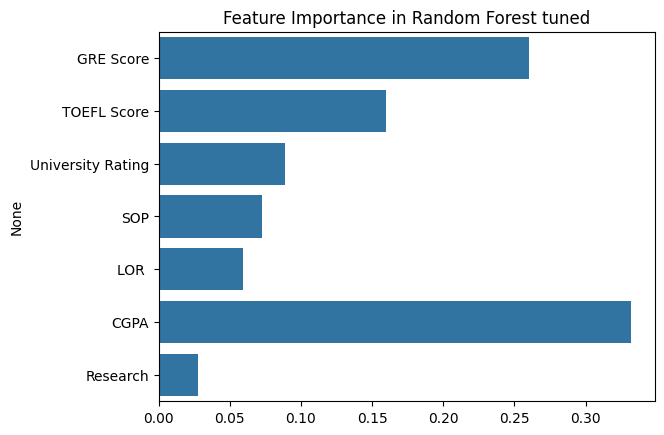

In [89]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()

importances1 = best_rf.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances1, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()


Random forest tuned is the best model
CPGA and TOFL score have the hightes impact to make an accurate predcition.

In [ ]:
print("--------------------Prediction with rf tuning----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=best_rf.predict(c)
print(b3)


--------------------Prediction with rf tuning----------------------------------------------
[0.46995296]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Save the Models

In [ ]:
import joblib

# Save the Linear Regression model
joblib.dump(multiple_linear_regression, '/content/drive/MyDrive/ATom/ML_Project3/linear_regression_model.pkl')

# Save the best Decision Tree model from GridSearchCV
joblib.dump(best_model, '/content/drive/MyDrive/ATom/ML_Project3/tuned_decision_tree_model.pkl')

# Save the initial Random Forest model (not tuned)
joblib.dump(random_forest_reg, '/content/drive/MyDrive/ATom/ML_Project3/random_forest_model_untuned.pkl')

# Save the best Random Forest model from GridSearchCV
joblib.dump(best_rf, '/content/drive/MyDrive/ATom/ML_Project3/tuned_random_forest_model.pkl')

print("Models saved successfully.")

Models saved successfully.


In [119]:
#LOADing Models
import joblib

# Load the saved models
loaded_lr_model = joblib.load('/content/drive/MyDrive/ATom/ML_Project3/linear_regression_model.pkl')
loaded_dt_model = joblib.load('/content/drive/MyDrive/ATom/ML_Project3/tuned_decision_tree_model.pkl')
loaded_rf_untuned_model = joblib.load('/content/drive/MyDrive/ATom/ML_Project3/random_forest_model_untuned.pkl')
loaded_rf_tuned_model = joblib.load('/content/drive/MyDrive/ATom/ML_Project3/tuned_random_forest_model.pkl')

GRE 322, TOEFL 111, CGPA 8.9, University rating 3, strong research.

GRE,TOEFL,UR,CGPA,Research

In [14]:
#Given
applicant = np.array([[322, 111, 3, 8.9,1]])


In [19]:
# Load and Predict with saved model

new_applicant = np.array([[322, 111, 3, 3.5, 3.5, 8.9, 1]])  # GRE, TOEFL, Univ Rating, SOP, LOR, CGPA, Research
admit_chance = loaded_rf_tuned_model.predict(new_applicant)[0]
print(f"\nPredicted Admission Chance: {admit_chance:.2%}")


Predicted Admission Chance: 78.08%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [96]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [102]:

def evaluate_model(model, x_train, y_train, x_test, y_test, model_name="Model"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE without 'squared' keyword
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return rmse, r2


In [103]:
#Trained RF Model
importances = best_rf.feature_importances_
feature_names = x.columns

# Get top 5 features based on importance
top5_indices = np.argsort(importances)[-5:][::-1]
top5_features = x.columns[top5_indices]

print("Top 5 Features:", top5_features)

x_train_top5 = x_train[top5_features]
x_test_top5 = x_test[top5_features]


evaluate_model(LinearRegression(), scaler.fit_transform(x_train_top5), y_train, scaler.transform(x_test_top5), y_test, "Linear Regression (Top 5)")
evaluate_model(DecisionTreeRegressor(random_state=42), x_train_top5, y_train, x_test_top5, y_test, "Decision Tree (Top 5)")
evaluate_model(RandomForestRegressor(random_state=42), x_train_top5, y_train, x_test_top5, y_test, "Random Forest (Top 5)")


Top 5 Features: Index(['CGPA', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP'], dtype='object')
Linear Regression (Top 5) - RMSE: 0.07, R²: 0.80
Decision Tree (Top 5) - RMSE: 0.11, R²: 0.57


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (Top 5) - RMSE: 0.07, R²: 0.78


(np.float64(0.07461676922783514), 0.7843943474143745)

Function for demo

In [122]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def demo_day_prediction(
    model_path="/content/drive/MyDrive/ATom/ML_Project3/tuned_decision_tree_model.pkl",
    gre=322,
    toefl=111,
    cgpa=8.9,
    university_rating=3,
    research=1):


    # Load the model
    with open(model_path, "rb") as file:
        model = pickle.load(file)

    # Define input features for the hypothetical applicant
    applicant_features = np.array([[gre, toefl, university_rating, cgpa, research]])

    # Predict the admission chance
    prediction = model.predict(applicant_features)[0] * 100
    print(f"\n🎯 Predicted Admission Chance: {prediction:.2f}%")

    # Visualize the tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        model,
        feature_names=["GRE Score", "TOEFL Score", "University Rating", "CGPA", "Research"],
        filled=True,
        rounded=True,
        max_depth=3,
        fontsize=10
    )
    plt.title("Decision Tree Visualization (Top 3 Levels)", fontsize=16)
    plt.show()

    # Explain the decision path
    node_indicator = model.decision_path(applicant_features)
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    print("\n🧭 Decision Path:")
    for node_id in node_indicator.indices:
        if feature[node_id] != -2:
            feature_name = ["GRE Score", "TOEFL Score", "University Rating", "CGPA", "Research"][feature[node_id]]
            threshold_val = threshold[node_id]
            applicant_val = applicant_features[0][feature[node_id]]
            decision = "<=" if applicant_val <= threshold_val else ">"
            print(f" - {feature_name} ({applicant_val}) {decision} {threshold_val:.2f}")

    # Recommendation
    print("\n🎓 Recommendation:")
    if prediction >= 80:
        print("✅ Strong admit. Consider for scholarship.")
    elif prediction >= 70:
        print("⚖️ Borderline. Strong academic profile; interview recommended.")
    else:
        print("❌ Weak profile. Unlikely to admit without improvement.")

